In [1]:
## define enviroment
import sys, os
from pathlib import Path
home = str(Path.home())
toolset_dir = home+'/repositories/dopamine/toolset'
toolset_common = toolset_dir+"/common"
toolset_gpcr = toolset_dir+"/gpcr"
sys.path.insert(0, toolset_dir)
sys.path.insert(0, toolset_common)
sys.path.insert(0, toolset_gpcr)
## end define enviroment
from dev_gpcr_contact import *
#from mkplots import *
from plot_master import *


sys.path.append('/home/khlee/repositories/pia-x/coupler/scripts')
from run import *
from _heatmap import *



print (sys.version)


3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


In [2]:
import MDAnalysis as mda
import pandas as pd
import numpy as np
import pickle
import glob

In [3]:
# configuration

testingdata_dir="/home/khlee/repositories/dopamine/toolset/beta/data"

# number of unit

## Gi case
PDB_1=testingdata_dir+"/drd3_gi_pd_mod.pdb"
DCD_1=testingdata_dir+"/drd3_gi_pd_n10.dcd"
u_1 = mda.Universe(PDB_1, DCD_1)

## Go case
PDB_2=testingdata_dir+"/drd3_go_pd_mod.pdb"
DCD_2=testingdata_dir+"/drd3_go_pd_n10.dcd"
u_2 = mda.Universe(PDB_2, DCD_2)


In [4]:
## first calculation
df_RA_1=get_df_contacts_frequency(u_1, chain1="R", chain2="A")
df_RA_2=get_df_contacts_frequency(u_2, chain1="R", chain2="A")
df_RB_1=get_df_contacts_frequency(u_1, chain1="R", chain2="B")
df_RB_2=get_df_contacts_frequency(u_2, chain1="R", chain2="B")
df_AR_1=get_df_contacts_frequency(u_1, chain1="A", chain2="R")
df_AR_2=get_df_contacts_frequency(u_2, chain1="A", chain2="R")
df_BR_1=get_df_contacts_frequency(u_1, chain1="B", chain2="R")
df_BR_2=get_df_contacts_frequency(u_2, chain1="B", chain2="R")

TIMER: Function completed time is: 8.98761
TIMER: Function completed time is: 8.92345
TIMER: Function completed time is: 9.01506
TIMER: Function completed time is: 9.03597
TIMER: Function completed time is: 6.98106
TIMER: Function completed time is: 6.87310
TIMER: Function completed time is: 9.83513
TIMER: Function completed time is: 9.86399


In [5]:
t1 = time.time()

# get union from different targets
common_RA = get_union(df_RA_1, df_RA_2)
common_RB = get_union(df_RB_1, df_RB_2)
common_AR = get_union(df_AR_1, df_AR_2)
common_BR = get_union(df_BR_1, df_BR_2)

# update to dataframes with common resids
df_RA_1c=get_union_df(df_RA_1,common_RA)
df_RA_2c=get_union_df(df_RA_2,common_RA)
df_RB_1c=get_union_df(df_RB_1,common_RB)
df_RB_2c=get_union_df(df_RB_2,common_RB)
df_AR_1c=get_union_df(df_AR_1,common_AR)
df_AR_2c=get_union_df(df_AR_2,common_AR)
df_BR_1c=get_union_df(df_BR_1,common_BR)
df_BR_2c=get_union_df(df_BR_2,common_BR)

t2 = time.time()
print("TIMER: Function completed time is: %.5f" % (t2 - t1))


TIMER: Function completed time is: 0.29799


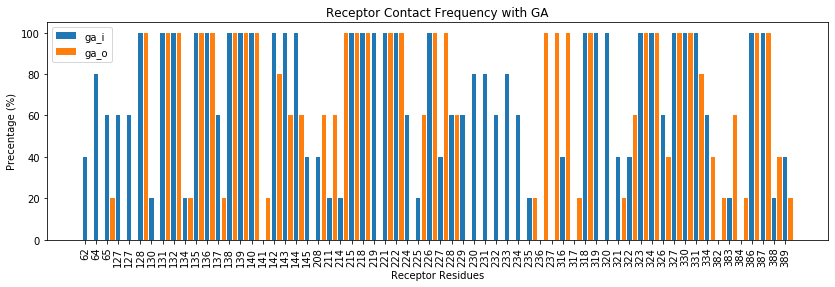

In [6]:
tt = pd.DataFrame({
            'ga_i': list(df_RA_1c['freq (%)']),
            'ga_o': list(df_RA_2c['freq (%)'])},
            index=list(df_RA_1c['resids']))

title  = 'Receptor Contact Frequency with GA'
xlabel = 'Receptor Residues'
ylabel = 'Precentage (%)'

barplot(tt, title, xlabel, ylabel)

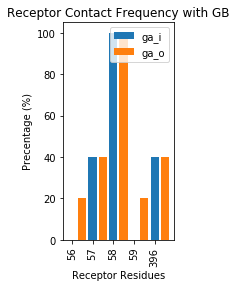

In [7]:

tt = pd.DataFrame({
            'ga_i': list(df_RB_1c['freq (%)']),
            'ga_o': list(df_RB_2c['freq (%)'])},
            index=list(df_RB_1c['resids']))

title  = 'Receptor Contact Frequency with GB'
xlabel = 'Receptor Residues'
ylabel = 'Precentage (%)'

barplot(tt, title, xlabel, ylabel)

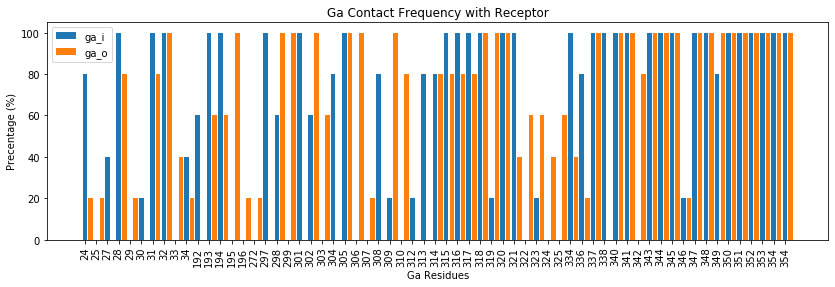

In [8]:
tt = pd.DataFrame({
            'ga_i': list(df_AR_1c['freq (%)']),
            'ga_o': list(df_AR_2c['freq (%)'])},
            index=list(df_AR_1c['resids']))

title  = 'Ga Contact Frequency with Receptor'
xlabel = 'Ga Residues'
ylabel = 'Precentage (%)'

barplot(tt, title, xlabel, ylabel)

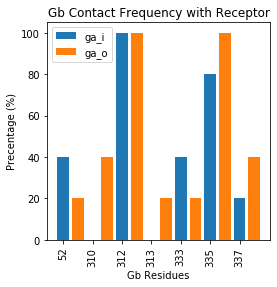

In [9]:
tt = pd.DataFrame({
            'ga_i': list(df_BR_1c['freq (%)']),
            'ga_o': list(df_BR_2c['freq (%)'])},
            index=list(df_BR_1c['resids']))

title  = 'Gb Contact Frequency with Receptor'
xlabel = 'Gb Residues'
ylabel = 'Precentage (%)'

barplot(tt, title, xlabel, ylabel)

In [10]:
# define common residues
common_rec=common_RB+common_RA
common_ga=common_AR
common_gb=common_BR

# calculate distance matrix
matrix_RA_1,matrix_RA_sd_1,matrix_RA_freq_1=get_dist_freq_matrix(u_1,common_rec,'R',common_ga,'A')
matrix_RA_2,matrix_RA_sd_2,matrix_RA_freq_2=get_dist_freq_matrix(u_2,common_rec,'R',common_ga,'A')
matrix_RB_1,matrix_RB_sd_1,matrix_RB_freq_1=get_dist_freq_matrix(u_1,common_rec,'R',common_gb,'B')
matrix_RB_2,matrix_RB_sd_2,matrix_RB_freq_2=get_dist_freq_matrix(u_2,common_rec,'R',common_gb,'B')

# concatenate two matrixes
matrix_freq_1=np.concatenate((matrix_RA_freq_1, matrix_RB_freq_1), axis=1)
matrix_freq_2=np.concatenate((matrix_RA_freq_2, matrix_RB_freq_2), axis=1)

# matrix difference
matrix_diff=get_matrix_diff(matrix_freq_1, matrix_freq_2)

TIMER: Function completed time is: 17.11564
TIMER: Function completed time is: 17.07089
TIMER: Function completed time is: 3.39433
TIMER: Function completed time is: 3.41148


In [11]:
# prepare labels
labels_rec=get_labels2(u_1, common_rec, "R")
labels_ga=get_labels2(u_1, common_ga, "A")
labels_gb=get_labels2(u_1, common_gb, "B")
xlabels=labels_rec
#ylabels=np.concatenate((ylabels,ylabels2),axis=0)
ylabels=list(labels_ga)+list(labels_gb)
x_axis_label="Rec"
y_axis_label="Ga+Gb"

Text(0, 0.5, 'Ga+Gb')

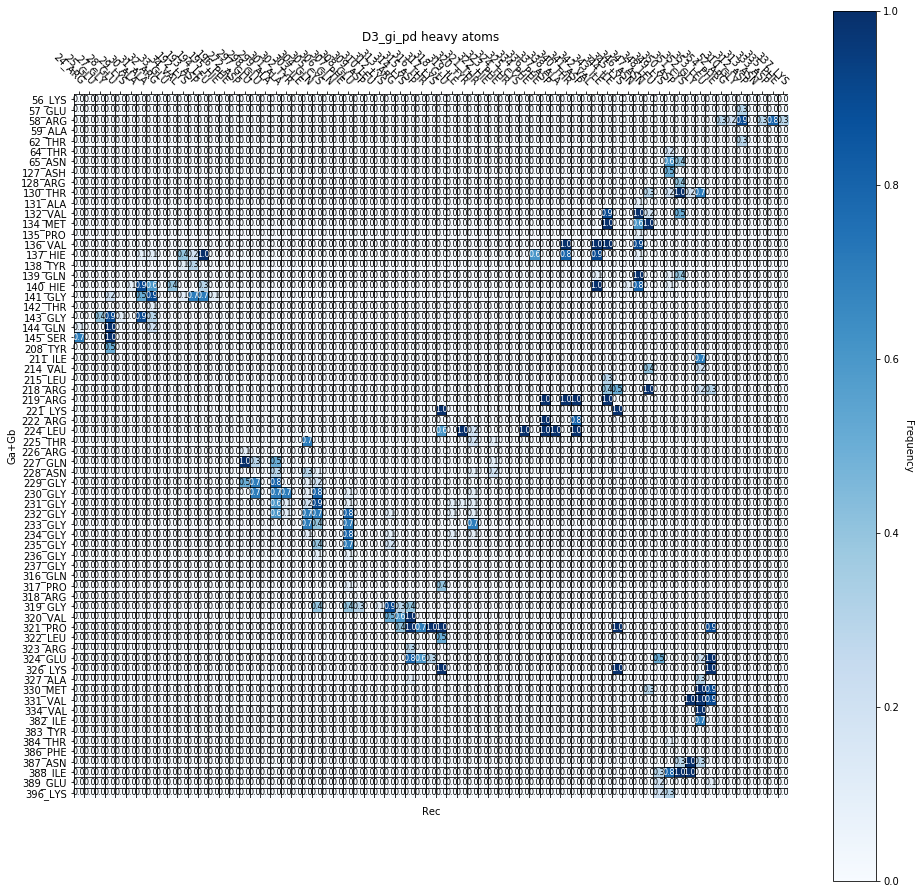

In [12]:
#xlabels, ylabels, x_axis_label, y_axis_label = get_labels(u_1, common_rec, common_ga)

plt.figure(figsize=(16,16))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_freq_1,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_gi_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'Ga+Gb')

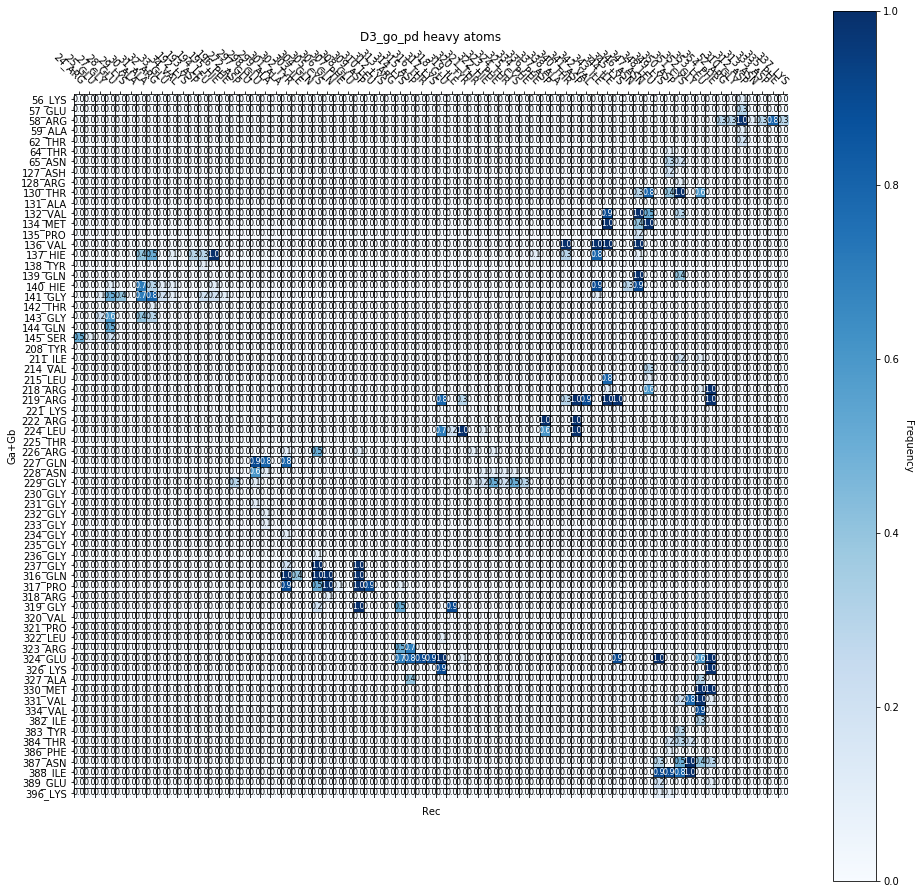

In [13]:
#xlabels, ylabels, x_axis_label, y_axis_label = get_labels(u_2, common_rec, common_ga)

plt.figure(figsize=(16,16))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_freq_2,xlabels, ylabels,ax=ax,cmap="Blues", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_go_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)


Text(0, 0.5, 'Ga+Gb')

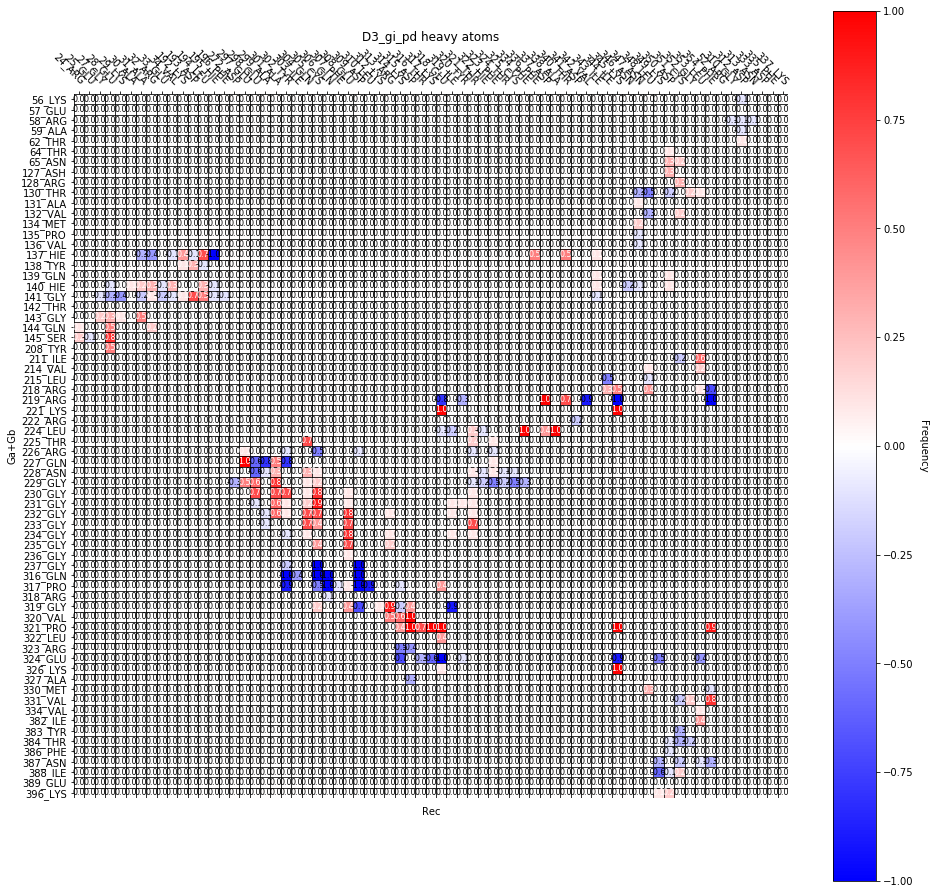

In [14]:
plt.figure(figsize=(16,16))
plot_index = 1
ax = plt.subplot(1, 1, plot_index)
im,cbar = heatmap(matrix_diff,xlabels, ylabels,ax=ax,cmap="bwr", cbarlabel="Frequency")
texts = annotate_heatmap(im, valfmt="{x:.1f}", size=8)
ax.set_title('D3_gi_pd heavy atoms')
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)